In [2]:
import pandas as pd
df = pd.read_csv("dataset_lemon.csv")
df

,diameter,berat,tebal_kulit,kadar_gula,asal_daerah,musim_panen,warna,kualitas
0,57.1,105,3.7,8.4,California,Puncak,Kuning cerah,Grade A
1,60.2,118,3.8,8.2,Malang,Puncak,Kuning cerah,Grade A
2,48.5,80,4.6,7.8,Medan,Akhir,Kuning kehijauan,Grade B
3,65.8,136,5.1,7.0,California,Akhir,Hijau pekat,Reject
4,55.9,101,3.5,8.5,Malang,Awal,Kuning cerah,Grade A
...,...,...,...,...,...,...,...,...
790,54.9,98,4.2,7.7,Medan,Akhir,Kuning kehijauan,Grade B
791,67.2,141,5.7,6.8,California,Akhir,Hijau pekat,Reject
792,57.0,105,3.5,8.4,Malang,Awal,Kuning cerah,Grade A
793,51.1,89,4.5,7.9,Medan,Puncak,Kuning kehijauan,Grade B


In [3]:
df.describe()

,diameter,berat,tebal_kulit,kadar_gula
count,795.000000,795.000000,795.000000,795.000000
mean,56.646918,105.427673,4.324906,7.772075
std,6.134574,19.890398,0.711215,0.514304
min,45.500000,70.000000,3.400000,6.700000
25%,51.600000,91.000000,3.800000,7.400000
50%,56.100000,103.000000,4.200000,7.900000
75%,61.300000,121.000000,4.600000,8.200000
max,68.500000,145.000000,6.000000,8.600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diameter     795 non-null    float64
 1   berat        795 non-null    int64  
 2   tebal_kulit  795 non-null    float64
 3   kadar_gula   795 non-null    float64
 4   asal_daerah  795 non-null    object 
 5   musim_panen  795 non-null    object 
 6   warna        795 non-null    object 
 7   kualitas     795 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 49.8+ KB


In [5]:
df["asal_daerah"].value_counts()

asal_daerah
California    265
Malang        265
Medan         265
Name: count, dtype: int64

In [6]:
df["musim_panen"].value_counts()

musim_panen
Puncak    318
Akhir     239
Awal      238
Name: count, dtype: int64

In [7]:
df["warna"].value_counts()

warna
Kuning cerah        346
Kuning kehijauan    290
Hijau pekat         159
Name: count, dtype: int64

In [9]:
df["kualitas"].value_counts()

kualitas
Grade A    346
Grade B    290
Reject     159
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

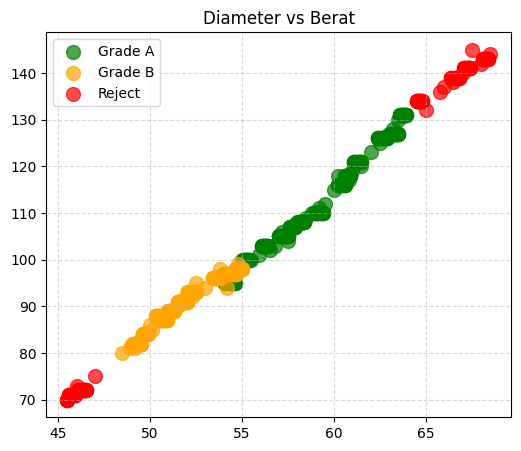

In [72]:
import matplotlib.pyplot as plt

gradea = df[df["kualitas"]=="Grade A"]
gradeb = df[df["kualitas"]=="Grade B"]
reject = df[df["kualitas"]=="Reject"]

plt.figure(figsize=(6,5))

plt.scatter(gradea["diameter"], gradea["berat"], s=100, alpha=0.7, color="green", label="Grade A")
plt.scatter(gradeb["diameter"], gradeb["berat"], s=100, alpha=0.7, color="orange", label="Grade B")
plt.scatter(reject["diameter"], reject["berat"], s=100, alpha=0.7, color="red", label="Reject")

plt.xlabel=("Diameter")
plt.ylabel=("Berat")
plt.title("Diameter vs Berat")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

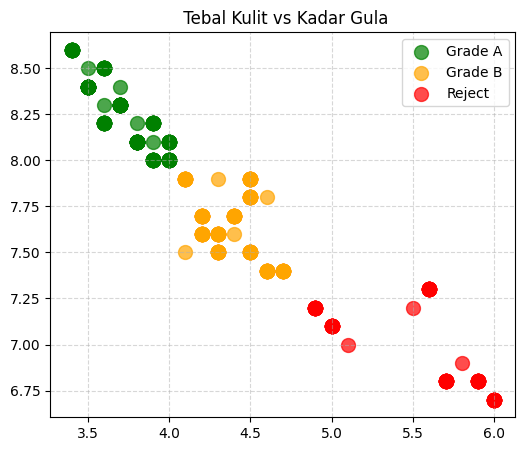

In [74]:
import matplotlib.pyplot as plt

gradea = df[df["kualitas"]=="Grade A"]
gradeb = df[df["kualitas"]=="Grade B"]
reject = df[df["kualitas"]=="Reject"]

plt.figure(figsize=(6,5))

plt.scatter(gradea["tebal_kulit"], gradea["kadar_gula"], s=100, alpha=0.7, color="green", label="Grade A")
plt.scatter(gradeb["tebal_kulit"], gradeb["kadar_gula"], s=100, alpha=0.7, color="orange", label="Grade B")
plt.scatter(reject["tebal_kulit"], reject["kadar_gula"], s=100, alpha=0.7, color="red", label="Reject")

plt.xlabel=("Tebal Kulit")
plt.ylabel=("Kadar Gula")
plt.title(" Tebal Kulit vs Kadar Gula")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["diameter","berat","tebal_kulit","kadar_gula","asal_daerah","musim_panen","warna"]]
y = df["kualitas"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["diameter", "berat", "tebal_kulit", "kadar_gula"]
categorical_columns = ["asal_daerah","musim_panen"]
ordinal_columns = ["warna"]

warna_order = ["Hijau pekat","Kuning kehijauan","Kuning cerah"]
ordinal_order = [warna_order]

preprocessing = ColumnTransformer(
    transformers = [
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns),
        ("ordinal", OrdinalEncoder(categories=ordinal_order), ordinal_columns)
    ]
)

model = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("model", LogisticRegression())
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy Score : 1.0

Classification Report :
               precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00        71
     Grade B       1.00      1.00      1.00        53
      Reject       1.00      1.00      1.00        35

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159


Confusion Matrix :
 [[71  0  0]
 [ 0 53  0]
 [ 0  0 35]]


In [56]:
data_baru = pd.DataFrame([[60.6, 120, 3.7, 8.4, "California", "Puncak", "Kuning cerah"]], 
                         columns=["diameter","berat","tebal_kulit","kadar_gula","asal_daerah","musim_panen","warna"])
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi Grade A dengan tingkat keyakinan 99.94%


In [53]:
df

,diameter,berat,tebal_kulit,kadar_gula,asal_daerah,musim_panen,warna,kualitas
0,57.1,105,3.7,8.4,California,Puncak,Kuning cerah,Grade A
1,60.2,118,3.8,8.2,Malang,Puncak,Kuning cerah,Grade A
2,48.5,80,4.6,7.8,Medan,Akhir,Kuning kehijauan,Grade B
3,65.8,136,5.1,7.0,California,Akhir,Hijau pekat,Reject
4,55.9,101,3.5,8.5,Malang,Awal,Kuning cerah,Grade A
...,...,...,...,...,...,...,...,...
790,54.9,98,4.2,7.7,Medan,Akhir,Kuning kehijauan,Grade B
791,67.2,141,5.7,6.8,California,Akhir,Hijau pekat,Reject
792,57.0,105,3.5,8.4,Malang,Awal,Kuning cerah,Grade A
793,51.1,89,4.5,7.9,Medan,Puncak,Kuning kehijauan,Grade B


In [67]:
import joblib

joblib.dump(model, "model_klasifikasi_lemon.joblib")

['model_klasifikasi_lemon.joblib']